## 로지스틱 회귀분석

- #### 대출을 해줄 수 있는지 여부 판단
    - target : Personal Loan 
    
    - 데이터셋 : https://www.kaggle.com/iconoclash/personal-loan-dataset-binary-classification

- #### 데이터 준비

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression #로지스틱 회귀분석을 위한
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [13]:
ploan = pd.read_csv("Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
ploan.info()
#결측치 없음. 하지만 id와 zip code 는 불필요함. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [15]:
#의미 없는 변수 제거 
ploan_processed = ploan.drop(['ID','ZIP Code'],axis=1,inplace =False)
ploan_processed.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [16]:
ploan_processed.info() #삭제됐는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2500 non-null   int64  
 1   Experience          2500 non-null   int64  
 2   Income              2500 non-null   int64  
 3   Family              2500 non-null   int64  
 4   CCAvg               2500 non-null   float64
 5   Education           2500 non-null   int64  
 6   Mortgage            2500 non-null   int64  
 7   Personal Loan       2500 non-null   int64  
 8   Securities Account  2500 non-null   int64  
 9   CD Account          2500 non-null   int64  
 10  Online              2500 non-null   int64  
 11  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 234.5 KB


In [17]:
#앞에 상수항 추가해서 확인하기
ploan_processed  = sm.add_constant(ploan_processed)
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


- #### 데이터 분리

In [18]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
x = ploan_processed[feature_columns] #특성변수 
y = ploan_processed['Personal Loan']  #타겟변수 : 대출여부 1 or 0

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.7,test_size=0.3,random_state =102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1750, 12) (750, 12) (1750,) (750,)


- #### 로지스틱회귀모형 모델링

In [20]:
model=sm.Logit(y_train,x_train)  #Logit(타겟변수,특성변수)
results = model.fit(method="newton") 

Optimization terminated successfully.
         Current function value: 0.129622
         Iterations 9


In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.6088
Time:                        13:47:14   Log-Likelihood:                -226.84
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                2.891e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0601      0.095      0.630      0.529      -0.127       0.247
CCAvg                  0.1412      0.064      2.196      0.028       0.015       0.267
CD Account             3.8711      0.567      6.827      0.000       2.760       4.982
CreditCard            -1.5362      0.358     -4.293      0.000      -2.238      -0.835
Education              1.8225      0.199      9.143      0.000       1.432       2.213
Experience            -0.0426      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5957      0.123      4.859      0.000       0.355       0.836
Income                 0.0540      0.004     12.292      0.000       0.045       0.063
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5070      0.262     -1.939      0.053      -1.020       0.006
Securities Account    -1.3259      0.524     -2.532      0.011      -2.352      -0.300
const                -14.9293      2.640     -5.656      0.000     -20.103      -9.755
======================================================================================
"""

In [22]:
results.params #회귀계수들만 따로  확인 가능함.
#Logit해석: family의 가족구성원 수가 1 증가할 수록 , 대출 가능성이 0.59Logit 증가한다.

Age                    0.060094
CCAvg                  0.141168
CD Account             3.871068
CreditCard            -1.536217
Education              1.822529
Experience            -0.042629
Family                 0.595657
Income                 0.054049
Mortgage              -0.000330
Online                -0.507031
Securities Account    -1.325944
const                -14.929306
dtype: float64

In [23]:
np.exp(results.params)
#exponential 이용한  함수가 좀더 와닿음.

Age                   1.061936e+00
CCAvg                 1.151619e+00
CD Account            4.799360e+01
CreditCard            2.151937e-01
Education             6.187488e+00
Experience            9.582666e-01
Family                1.814222e+00
Income                1.055537e+00
Mortgage              9.996706e-01
Online                6.022809e-01
Securities Account    2.655522e-01
const                 3.283105e-07
dtype: float64

In [24]:
results.aic

477.6763428710175

In [25]:
y_pred= results.predict(x_test)
y_pred
#0에서 1사이의 함수값으로나타냄. 

924     0.009612
2357    0.005326
455     0.014446
387     0.044246
343     0.003249
          ...   
2124    0.000805
2100    0.029638
893     0.000271
1669    0.000125
2218    0.000396
Length: 750, dtype: float64

In [26]:
#0.5 이상은  1 반환, 0.5 이하 0반환
def PRED(y,threshold):
    Y = y.copy() #원본이 변경되지 않도록 사본 만들기 
    Y[ Y>threshold ]=1
    Y[ Y<=threshold ]=0
    return(Y.astype(int))


Y_pred = PRED(y_pred,0.5)
Y_pred


924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int32

In [27]:
#전체값에서  [0,0] : 정상을 정상으로,[1,1] :이상을 이상으로  예측한  값의비율 => 정확도

cfmat = confusion_matrix(y_test,Y_pred)
print(cfmat)

[[663  11]
 [ 29  47]]


In [28]:
#accuracy 정확도 확인하는 함수
def acc(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [29]:
acc(cfmat)

0.9466666666666667

- #### 임계값에 따른 성능지표 비교

In [30]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])

for i in threshold:
    Y_pred = PRED(y_pred,i)
    cfmat = confusion_matrix(y_test,Y_pred)
    table.loc[i] = acc(cfmat)
    
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.101333
0.1,0.861333
0.2,0.901333
0.3,0.920000
0.4,0.938667
0.5,0.946667
0.6,0.949333
0.7,0.952000
0.8,0.952000


AUC: 0.9393838825550523


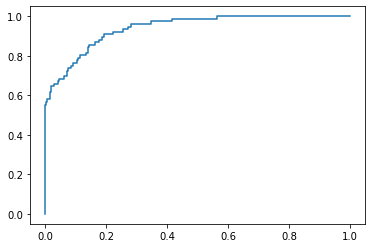

In [31]:
#fpr : false positive rate 
#tpr : true positive rate
#confusion matrix에 있는 값들

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)


#print auc
auc = np.trapz(tpr,fpr)
print('AUC:',auc) 

#roc커브의 아래쪽 넓이가 auc임 
#0.939 면 꽤 높은 편

- #### Experience, Mortgage 변수 제거

In [32]:
feature_columns2 = list(ploan_processed.columns.difference(["Personal Loan","Expreience","Mortgage"]))
X2 = ploan_processed[feature_columns2]
y2 = ploan_processed['Personal Loan'] #대출여부 1 or 0

x2_train,x2_test,y2_train,y2_test =train_test_split(X2,y2,train_size=0.7,test_size=0.3,random_state=102)


print(x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [33]:
model2 = sm.Logit(y2_train,x2_train)
result2 = model2.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.129656
         Iterations 9


In [34]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1739
Method:                           MLE   Df Model:                           10
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.6087
Time:                        13:47:15   Log-Likelihood:                -226.90
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                3.552e-145
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0599      0.095      0.627      0.531      -0.127       0.247
CCAvg                  0.1437      0.064      2.251      0.024       0.019       0.269
CD Account             3.8675      0.566      6.838      0.000       2.759       4.976
CreditCard            -1.5275      0.356     -4.286      0.000      -2.226      -0.829
Education              1.8254      0.199      9.167      0.000       1.435       2.216
Experience            -0.0427      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5933      0.122      4.853      0.000       0.354       0.833
Income                 0.0538      0.004     12.430      0.000       0.045       0.062
Online                -0.5074      0.262     -1.940      0.052      -1.020       0.005
Securities Account    -1.3224      0.523     -2.531      0.011      -2.347      -0.298
const                -14.9226      2.642     -5.649      0.000     -20.100      -9.745
======================================================================================
"""

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.6088
Time:                        13:47:16   Log-Likelihood:                -226.84
converged:                       True   LL-Null:                       -579.80
Covariance Type:            nonrobust   LLR p-value:                2.891e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0601      0.095      0.630      0.529      -0.127       0.247
CCAvg                  0.1412      0.064      2.196      0.028       0.015       0.267
CD Account             3.8711      0.567      6.827      0.000       2.760       4.982
CreditCard            -1.5362      0.358     -4.293      0.000      -2.238      -0.835
Education              1.8225      0.199      9.143      0.000       1.432       2.213
Experience            -0.0426      0.095     -0.448      0.654      -0.229       0.144
Family                 0.5957      0.123      4.859      0.000       0.355       0.836
Income                 0.0540      0.004     12.292      0.000       0.045       0.063
Mortgage              -0.0003      0.001     -0.343      0.732      -0.002       0.002
Online                -0.5070      0.262     -1.939      0.053      -1.020       0.006
Securities Account    -1.3259      0.524     -2.532      0.011      -2.352      -0.300
const                -14.9293      2.640     -5.656      0.000     -20.103      -9.755
======================================================================================
"""

In [36]:
y2_pred = result2.predict(x2_test)
y2_pred

924     0.009496
2357    0.005240
455     0.014256
387     0.043408
343     0.003364
          ...   
2124    0.000817
2100    0.029472
893     0.000268
1669    0.000125
2218    0.000394
Length: 750, dtype: float64

In [37]:
Y2_pred = PRED(y2_pred,0.5) 
Y2_pred

924     0
2357    0
455     0
387     0
343     0
       ..
2124    0
2100    0
893     0
1669    0
2218    0
Length: 750, dtype: int32

In [38]:
cfmat2 = confusion_matrix(y_test,Y_pred)
print(cfmat2)

[[674   0]
 [ 42  34]]


In [39]:
acc(cfmat2)

0.944

In [40]:
threshold = np.arange(0,1,0.1)
table2 = pd.DataFrame(columns=['ACC'])

for i in threshold:
    Y2_pred = PRED(y2_pred,i)
    cfmat2 = confusion_matrix(y2_test,Y2_pred)
    table2.loc[i] = acc(cfmat2)
    
table2.index.name = 'threshold'
table2.columns.name = 'performance'
table2

performance,ACC
threshold,
0.0,0.101333
0.1,0.865333
0.2,0.900000
0.3,0.922667
0.4,0.941333
0.5,0.948000
0.6,0.949333
0.7,0.953333
0.8,0.952000


AUC: 0.9394619709511167


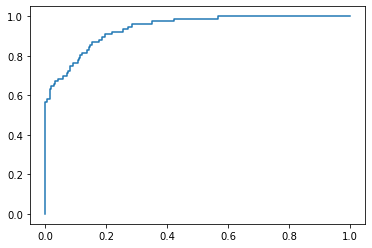

In [41]:
#fpr : false positive rate 
#tpr : true positive rate
#confusion matrix에 있는 값들

fpr2,tpr2,thresholds2 = metrics.roc_curve(y2_test,y2_pred)
plt.plot(fpr2,tpr2)


#print auc
auc2 = np.trapz(tpr2,fpr2)
print('AUC:',auc2) 
#roc커브의 아래쪽 넓이가 auc임 
#0.939 면 꽤 높은 편

### 회귀계수 축소법

In [42]:
from sklearn.linear_model import Ridge, Lasso , ElasticNet

In [43]:
ploan = pd.read_csv("Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [44]:
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'],axis=1,inplace=False)
ploan_processed = sm.add_constant(ploan_processed,has_constant='add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [45]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size =0.7,test_size=0.3,random_state =102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1750, 12) (750, 12) (1750,) (750,)


- #### Lasso

In [47]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [48]:
lasso.coef_

array([ 4.89681547e-04,  8.00850400e-03,  6.59810232e-02, -0.00000000e+00,
        7.48241892e-02,  8.81624384e-05,  2.64904770e-02,  3.49537610e-03,
        2.59297464e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [49]:
pred_y_lasso = lasso.predict(x_test)
pred_Y_lasso = PRED(pred_y_lasso,0.5)

In [50]:
cfmat = confusion_matrix(y_test,pred_Y_lasso)
print(acc(cfmat))

0.932


AUC: 0.942468374199594


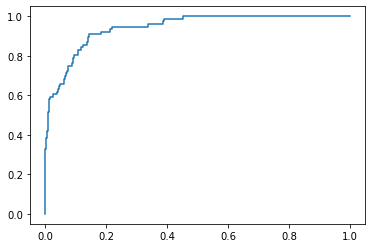

In [51]:
#fpr : false positive rate 
#tpr : true positive rate
#confusion matrix에 있는 값들

fpr2,tpr2,thresholds2 = metrics.roc_curve(y2_test,pred_y_lasso)
plt.plot(fpr2,tpr2)


#print auc
auc2 = np.trapz(tpr2,fpr2)
print('AUC:',auc2) 
#roc커브의 아래쪽 넓이가 auc임 
#0.939 면 꽤 높은 편

- #### Ridge

In [53]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [54]:
pred_y_ridge = ridge.predict(x_test)
pred_Y_ridge = PRED(pred_y_ridge,0.5)

In [55]:
cfmat = confusion_matrix(y_test,pred_Y_ridge)
print(acc(cfmat))

0.9453333333333334


AUC: 0.9502967359050445


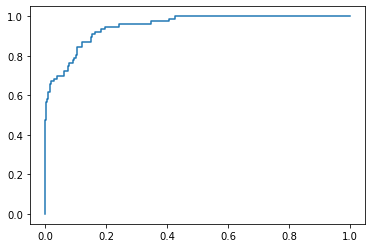

In [56]:
#fpr : false positive rate 
#tpr : true positive rate
#confusion matrix에 있는 값들

fpr2,tpr2,thresholds2 = metrics.roc_curve(y2_test,pred_y_ridge)
plt.plot(fpr2,tpr2)


#print auc
auc2 = np.trapz(tpr2,fpr2)
print('AUC:',auc2) 
#roc커브의 아래쪽 넓이가 auc임 
#0.939 면 꽤 높은 편

- #### ElasticNet

0.9453333333333334
AUC: 0.9491058878650632


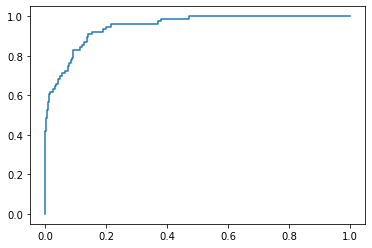

In [58]:
elastic = ElasticNet(alpha=0.01,l1_ratio=0.5)
elastic.fit(x_train,y_train)
elastic.coef_


pred_y_elastic =  elastic.predict(x_test)
pred_Y_elastic = PRED(pred_y_ridge,0.5)


cfmat = confusion_matrix(y_test,pred_Y_elastic)
print(acc(cfmat))



#fpr : false positive rate 
#tpr : true positive rate
#confusion matrix에 있는 값들

fpr2,tpr2,thresholds2 = metrics.roc_curve(y2_test,pred_y_elastic)
plt.plot(fpr2,tpr2)

#print auc
auc2 = np.trapz(tpr2,fpr2)
print('AUC:',auc2) 
#roc커브의 아래쪽 넓이가 auc임 
#0.939 면 꽤 높은 편
AUC: 0.9502967359050445


- alpha 값에 따른 정확도 변화

In [59]:
alpha = np.logspace(-3,1,5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [61]:
data = []
acc_table=[]

for i,a in enumerate(alpha):
    lasso =Lasso(alpha=a).fit(x_train,y_train)
    data.append(pd.Series(np.hstack([lasso.intercept_,lasso.coef_])))

    y_pred = lasso.predict(x_test)
    y_pred = PRED(y_pred,0.5)
    cfmat = confusion_matrix(y_test,y_pred)
    acc_table.append(acc(cfmat))
    

df_lasso = pd.DataFrame(data,index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.372872,-0.405644,-0.148552,-0.117516,0.102857
1,-0.000760,0.000490,0.000000,0.000000,-0.000000
2,0.011615,0.008009,0.000000,0.000000,0.000000
3,0.298692,0.065981,0.000000,0.000000,0.000000
4,-0.053192,-0.000000,-0.000000,-0.000000,-0.000000
5,0.085012,0.074824,0.000000,0.000000,0.000000
6,0.001324,0.000088,0.000000,0.000000,-0.000000
7,0.031592,0.026490,0.000000,0.000000,0.000000
8,0.003255,0.003495,0.003359,0.002956,0.000000
9,0.000002,0.000026,0.000017,0.000000,0.000000


In [62]:
acc_table_lasso = pd.DataFrame(acc_table,index=alpha).T
acc_table_lasso

,0.001,0.010,0.100,1.000,10.000
0,0.944,0.932,0.892,0.898667,0.898667


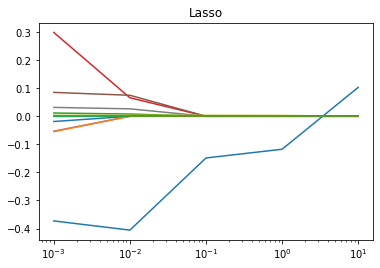

In [63]:
import matplotlib.pyplot as plt 
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()